# Classify whether a post will be high-performing by combining engagement metrics with sentiment and text analysis of its description.

This project makes the analysis actionable for content strategy, focusing on what types of descriptions or engagement patterns lead to success.

### Features:
1.  Text Features (from Post Descriptions):
* Sentiment Analysis:
Emotion analysis (joy, sadness, anger, etc., using NLP libraries like TextBlob or Hugging Face).
* Keywords and Topics:
Tokenize descriptions and extract key terms or hashtags.
Use TF-IDF or word embeddings (e.g., Word2Vec, BERT).
2. Engagement Metrics (from Content.csv):
Likes, shares, comments, saves, plays.
3. Post Metadata:
Posting time and day of the week.

### Methods:
* Logistic Regression:
Incorporate sentiment scores and engagement metrics as features.
Optimize parameters using MLE.
* NLP for Sentiment Analysis:
Preprocess text: tokenization, stopword removal, stemming/lemmatization.
Sentiment scoring using tools like VADER or Hugging Face models.
* Genetic Algorithm (Optional):
Optimize feature selection or model hyperparameters.

## 1. Data Preparation

In [ ]:
pip install --user vaderSentiment

In [310]:
import pandas as pd
import warnings
import numpy as np
import os
os.chdir('/Users/mariapiabellini/Desktop/AI AND ML/Project/insta')
warnings.filterwarnings('ignore')

* results.csv

In [311]:
results=pd.read_csv('Results.csv', sep=';')
results['Date'] = pd.to_datetime(results['Date'], format='%d/%m/%y')
results = results.sort_values(by='Date')

results.head()

,Date,Follows,Reach,Visits
0,2024-01-11,170,157578,1861
1,2024-01-12,183,285934,5088
2,2024-01-13,167,219504,2265
3,2024-01-14,180,209868,2745
4,2024-01-15,161,179481,1728


* content.csv

In [394]:
content_1 = pd.read_csv('Content/1.csv', sep=';')
content_1['Date'] = content_1['Publish time'].str.slice(0, -6)
content_1['Publish time'] = content_1['Publish time'].str.slice(11)

content_2 = pd.read_csv('Content/2.csv', sep=';')
content_2['Date'] = content_2['Publish time'].str.slice(0, -6)
content_2['Publish time'] = content_2['Publish time'].str.slice(11)

content_3 = pd.read_csv('Content/3.csv', sep=';')
content_3['Date'] = content_3['Publish time'].str.slice(0, -6)
content_3['Publish time'] = content_3['Publish time'].str.slice(11)

content_4 = pd.read_csv('Content/4.csv', sep=';')
content_4['Date'] = content_4['Publish time'].str.slice(0, -6)
content_4['Publish time'] = content_4['Publish time'].str.slice(11)

content = pd.concat([content_1, content_2, content_3, content_4], ignore_index=True)
content['Date'] = pd.to_datetime(content['Date'], format='%m/%d/%Y')
content['Publish time']=pd.to_datetime(content['Publish time'], format='%H:%M').dt.time
content = content[(content['Date'] >= '2024-01-11') & (content['Date'] <= '2024-12-11')]
content = content.fillna(0)
content = content.sort_values(by='Date')
content.head()

,Description,Publish time,Post type,Impressions,Reach,Likes,Shares,Follows,Comments,Saves,Plays,Date
321,Geniale?🌹🍽️\nTagga l’amica in fissa con @valep...,11:50:00,IG carousel,92583.0,78218.0,4974,8,4.0,66,147,0.0,2024-01-11
320,Tutti d’accordo sui @clubdogo?🥹💯\nGemitaiz non...,01:39:00,IG image,223402.0,217665.0,21497,26,32.0,169,443,0.0,2024-01-12
319,Cosa vi state ascoltando? 🌍👇🏼\n\nALBUM:\n\n💿 C...,03:53:00,IG carousel,41034.0,34197.0,2877,2,3.0,55,104,0.0,2024-01-12
318,TUTTI A CASA dopo il disco dei Dogo 👑🐕 \n\nSeg...,05:00:00,IG reel,350076.0,326520.0,25074,562,39.0,232,1827,608887.0,2024-01-12
317,😳 @babygang_1 sta per superare gli ascoltatori...,06:47:00,IG carousel,141714.0,110884.0,12632,40,2.0,301,451,0.0,2024-01-12


## 2. Features
### 2a. Engagement Rate
The Engagement Rate (ER) of an Instagram post is a key metric used to measure how much interaction (likes, comments, shares, saves) a post receives relative to its reach. It helps to assess the effectiveness of content in engaging the audience.

Formula:

 ER= $(\frac{Engagement}{Reach})*100$
Where:

Engagement is the total number of interactions a post receives, including likes, comments, shares, saves, etc.
Reach refers to the total number of unique users who saw the post.
* Interpretation:

Higher Engagement Rate: Indicates that the post is highly engaging, as a larger proportion of those who saw the post interacted with it.
Lower Engagement Rate: Suggests the post did not resonate well with the audience, as fewer viewers interacted with it.

* Use in Analysis:
By calculating the Engagement Rate, content creators, marketers, and analysts can identify which posts are performing well and which ones need improvement.
It also helps in understanding the content's ability to create meaningful interactions with the audience. A high Engagement Rate typically correlates with content that sparks interest, while a low rate might indicate the need for content adjustments or different strategies.
This metric is often used in conjunction with other data points (e.g., impressions, comments, shares) to evaluate the overall success of an Instagram marketing campaign.

In [618]:
data = pd.merge(content, results[['Date', 'Visits']], on='Date', how='inner')
data = data.sort_values(by='Date')
new_column_order = ['Description', 'Date', 'Publish time', 'Post type', 'Impressions', 'Reach', 'Likes', 'Shares', 'Follows', 'Comments', 'Saves', 'Plays', 'Visits']
data = data[new_column_order]
data = data.drop('Post type', axis=1)
data['Engagement'] = data['Likes'] + data['Shares'] + data['Comments'] + data['Saves']
data['Engagement_Rate'] = (data['Engagement'] / data['Reach'])*100

threshold = data['Engagement_Rate'].quantile(0.75)
data['High_Performance'] = (data['Engagement_Rate'] >= threshold).astype(int)
data[['Description','Date','Publish time','Engagement','Engagement_Rate','High_Performance']]

,Description,Date,Publish time,Engagement,Engagement_Rate,High_Performance
0,Geniale?🌹🍽️\nTagga l’amica in fissa con @valep...,2024-01-11,11:50:00,5195,6.641694,0
1,Tutti d’accordo sui @clubdogo?🥹💯\nGemitaiz non...,2024-01-12,01:39:00,22135,10.169297,0
2,Cosa vi state ascoltando? 🌍👇🏼\n\nALBUM:\n\n💿 C...,2024-01-12,03:53:00,3038,8.883820,0
3,TUTTI A CASA dopo il disco dei Dogo 👑🐕 \n\nSeg...,2024-01-12,05:00:00,27695,8.481869,0
4,😳 @babygang_1 sta per superare gli ascoltatori...,2024-01-12,06:47:00,13424,12.106345,1
...,...,...,...,...,...,...
1002,😅Ⓜ️ Era PREVEDIBILE?\n\n📹 Rai Radio 2 / @andre...,2024-12-10,09:33:00,10650,12.541806,1
1005,🪀💯💆🏻‍♀️ Piaciuto il pezzo?\n\nDopo aver fatto ...,2024-12-10,08:08:00,2517,5.562185,0
1007,🥖😭 Il bro voleva solo venire al concerto\n\n(E...,2024-12-11,03:34:00,11130,9.891839,0
1006,🔍🧐💯 Cosa dobbiamo aspettarci?\n\nNelle scorse ...,2024-12-11,02:27:00,10014,11.305673,1


## High performing posts
To identify high-performing posts on Instagram, we created a new variable called High_Performance based on the Engagement Rate. The goal was to classify posts into high-performing and low-performing categories to better understand which content resonates most with the audience.
1. Determine High Performance Threshold: To classify posts as high-performing, we identified the 75th percentile of the Engagement Rate. This was done because:
The 75th percentile is a commonly used threshold to identify top-performing items in a dataset. It represents the point where 75% of the posts have a lower engagement rate, and 25% have a higher engagement rate.
2. Assign High_Performance Variable: Based on the threshold, we created the High_Performance variable:
If the Engagement Rate was greater than or equal to the threshold, the post was assigned a value of 1 (indicating a high-performing post).
If the Engagement Rate was below the threshold, the post was assigned a value of 0 (indicating a low-performing post).
This allowed us to categorize posts into high-performing and low-performing groups based on their ability to engage the audience.

* Handling missing values and outliers

In [619]:
for column in ['Impressions', 'Reach', 'Visits', 'Follows']:
    column_mean = data[column].mean()
    data[column] = data[column].replace(0, column_mean)
data['Engagement_Rate'] = data['Engagement_Rate'].replace(float('inf'), data[data['Engagement_Rate'] != float('inf')]['Engagement_Rate'].mean())

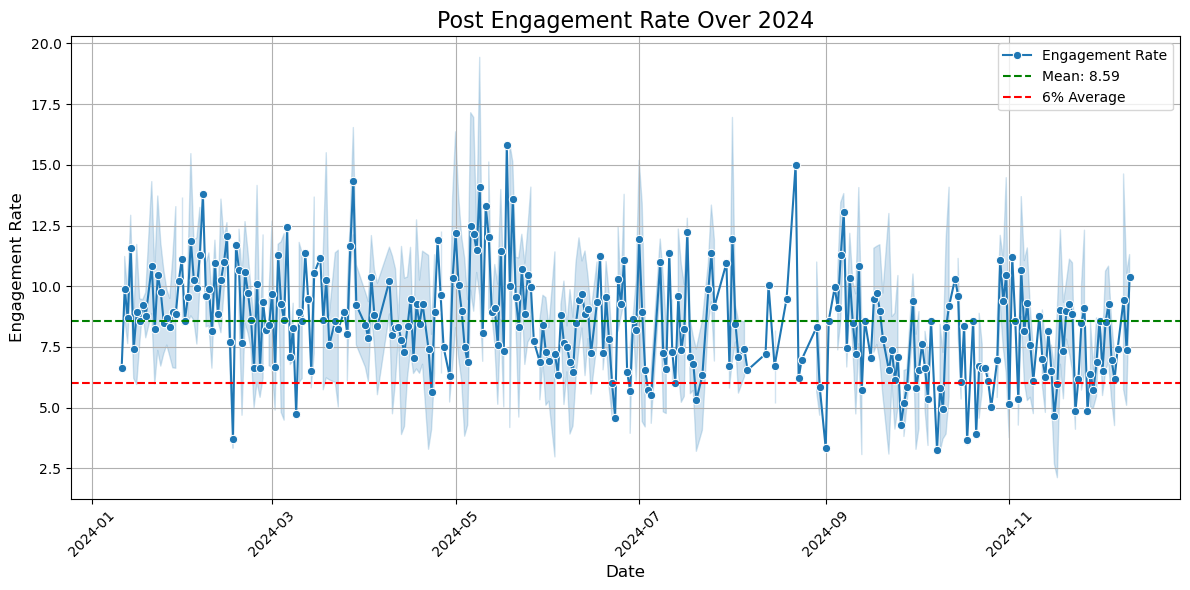

In [622]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Engagement_Rate', data=data, marker='o', label='Engagement Rate')

mean_engagement_rate = data['Engagement_Rate'].mean()
plt.axhline(y=mean_engagement_rate, color='green', linestyle='--', label=f'Mean: {mean_engagement_rate:.2f}')

plt.axhline(y=6, color='red', linestyle='--', label='6% Average')
plt.title('Post Engagement Rate Over 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2b. Emotion analysis
In this step, we apply Emotion Classification to the Description of each Instagram post to categorize the emotions expressed in the content. For this task, we used the Feel-it model from the Hugging Face library, specifically trained for emotion detection in Italian text. The model classifies the emotional tone of the text into different categories, such as joy, sadness, anger, and fear.

The Feel-it model works by analyzing the input text and assigning a label for the emotion with the highest probability. We use the pipeline function from the transformers library, which simplifies the process of running pre-trained models for text classification tasks.

Emotion Insight: Emotion analysis provides valuable insights into the feelings conveyed in the post descriptions. By categorizing posts by emotion, we can identify patterns in the content that evoke certain emotional responses from the audience. For example, posts classified as 'joy' might perform better due to the positive emotional tone.
Content Strategy: By understanding which emotions resonate the most with followers, content strategies can be tailored accordingly. If posts that express 'joy' or 'excitement' receive more engagement, future content can focus on these emotional tones to enhance audience connection.
Actionable Data: The emotion labels generated from this analysis provide actionable data that can be used in conjunction with other engagement metrics, such as likes or shares. For instance, if 'anger' correlates with higher engagement, we might explore more provocative or passionate content.

In [ ]:
pip install emoji
pip install nltk
pip install transformers torch

In [623]:
from transformers import pipeline
classifier = pipeline("text-classification",model='MilaNLProc/feel-it-italian-emotion',top_k=2)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at MilaNLProc/feel-it-italian-emotion.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [624]:
data['Emotion'] = data['Description'].apply(lambda x: classifier(x)[0][0]['label'])

In [625]:
emotion_percentages = data['Emotion'].value_counts(normalize=True) * 100
print(emotion_percentages)

Emotion
joy        81.863231
sadness     8.225966
anger       7.234886
fear        2.675917
Name: proportion, dtype: float64


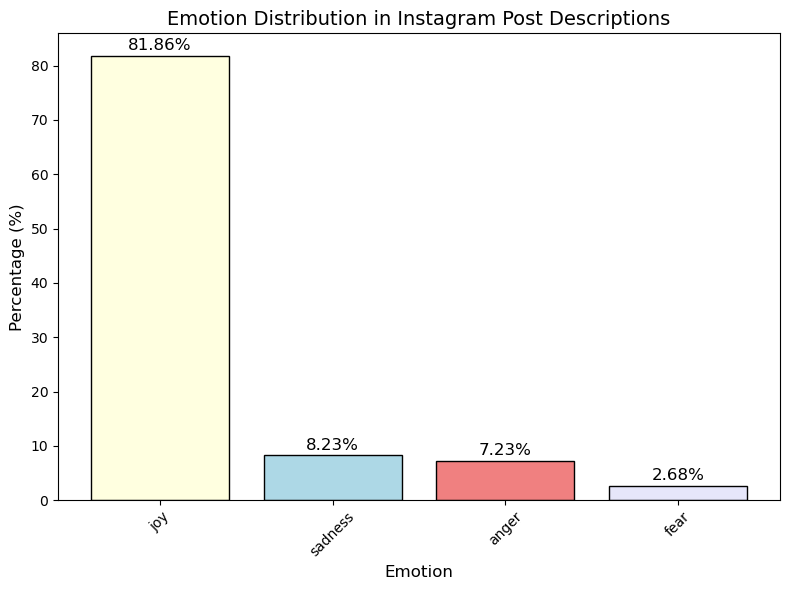

In [630]:
import matplotlib.pyplot as plt

emotion_percentages = data['Emotion'].value_counts(normalize=True) * 100

emotion_colors = {
    'joy': 'lightyellow',
    'sadness': 'lightblue',
    'anger': 'lightcoral',
    'fear': 'lavender'
}

plt.figure(figsize=(8, 6))

bars = plt.bar(emotion_percentages.index, emotion_percentages.values, color=[emotion_colors.get(emotion, 'gray') for emotion in emotion_percentages.index], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}%', ha='center', fontsize=12)

plt.title('Emotion Distribution in Instagram Post Descriptions', fontsize=14)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [546]:
from nltk.corpus import stopwords
italian_stop_words = stopwords.words('italian')

In [550]:
newwords=['cosa','dopo','già','stato','durante','essere']
for word in newwords:
    italian_stop_words.append(word)

In [551]:
import re
from collections import Counter

def extract_words_hashtags_emojis(text):
    words = re.findall(r'\b\w+\b', text.lower())
    hashtags = re.findall(r'#\w+', text)
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', text)
    #Stop words
    words = [word for word in words if word not in italian_stop_words]
    return words, hashtags, emojis

emotion_stats = {}

for emotion in data['Emotion'].unique():
    emotion_data = data[data['Emotion'] == emotion]['Description']
    all_words = []
    all_hashtags = []
    all_emojis = []
    for description in emotion_data:
        words, hashtags, emojis = extract_words_hashtags_emojis(description)
        all_words.extend(words)
        all_hashtags.extend(hashtags)
        all_emojis.extend(emojis)
    
    word_counts = Counter(all_words).most_common(10)
    hashtag_counts = Counter(all_hashtags).most_common(10)
    emoji_counts = Counter(all_emojis).most_common(10)
    emotion_stats[emotion] = {
        'Most Common Words': word_counts,
        'Most Common Hashtags': hashtag_counts,
        'Most Common Emojis': emoji_counts
    }

print("\nJOY:\n")
print("Most Common Words:")
for word, count in emotion_stats['joy']['Most Common Words']:
    print(f"{word}: {count}")
print("\nMost Common Hashtags:")
for hashtag, count in emotion_stats['joy']['Most Common Hashtags']:
    print(f"{hashtag}: {count}")
print("\nMost Common Emojis:")
for emoji, count in emotion_stats['joy']['Most Common Emojis']:
    print(f"{emoji}: {count}")
print("\n" + "-"*40)  

print("\nSADNESS:\n")
print("Most Common Words:")
for word, count in emotion_stats['sadness']['Most Common Words']:
    print(f"{word}: {count}")
print("\nMost Common Hashtags:")
for hashtag, count in emotion_stats['sadness']['Most Common Hashtags']:
    print(f"{hashtag}: {count}")
print("\nMost Common Emojis:")
for emoji, count in emotion_stats['sadness']['Most Common Emojis']:
    print(f"{emoji}: {count}")
print("\n" + "-"*40)

print("\nANGER:\n")
print("Most Common Words:")
for word, count in emotion_stats['anger']['Most Common Words']:
    print(f"{word}: {count}")
print("\nMost Common Hashtags:")
for hashtag, count in emotion_stats['anger']['Most Common Hashtags']:
    print(f"{hashtag}: {count}")
print("\nMost Common Emojis:")
for emoji, count in emotion_stats['anger']['Most Common Emojis']:
    print(f"{emoji}: {count}")
print("\n" + "-"*40)

print("\nFEAR:\n")
print("Most Common Words:")
for word, count in emotion_stats['fear']['Most Common Words']:
    print(f"{word}: {count}")
print("\nMost Common Hashtags:")
for hashtag, count in emotion_stats['fear']['Most Common Hashtags']:
    print(f"{hashtag}: {count}")
print("\nMost Common Emojis:")
for emoji, count in emotion_stats['fear']['Most Common Emojis']:
    print(f"{emoji}: {count}")
print("\n" + "-"*40)


JOY:

Most Common Words:
rapitaliano: 410
nuovo: 377
rapper: 249
singolo: 235
sapere: 231
brano: 205
progetto: 203
album: 198
secondo: 186
pezzo: 168

Most Common Hashtags:
#rapitaliano: 410
#nuovosingolo: 160
#spoiler: 66
#milano: 61
#tonyeffe: 56
#album: 53
#fan: 48
#concerto: 46
#lazza: 45
#artistiemergenti: 43

Most Common Emojis:
⤵️: 286
👀: 163
🎙️: 155
💿: 118
♂️: 117
📱: 105
🇮🇹: 97
✍🏻: 89
📍: 80
💯: 77

----------------------------------------

SADNESS:

Most Common Words:
rapper: 29
dissing: 22
rapitaliano: 19
nuovo: 17
geolier: 17
fedez: 17
secondo: 16
anni: 12
tonyeffe: 12
milano: 11

Most Common Hashtags:
#rapitaliano: 18
#dissing: 16
#tonyeffe: 12
#fedez: 10
#concerto: 8
#geolier: 8
#rondodasosa: 6
#risposta: 6
#sanremo2024: 5
#lazza: 5

Most Common Emojis:
⤵️: 11
♂️: 10
📱: 8
📲: 8
🚫: 7
💯: 6
🗣️: 6
🗞️: 6
🎬: 6
💀: 5

----------------------------------------

ANGER:

Most Common Words:
rapitaliano: 22
geolier: 17
rapper: 16
video: 14
fan: 14
sferaebbasta: 13
concertirap: 11
pensate:

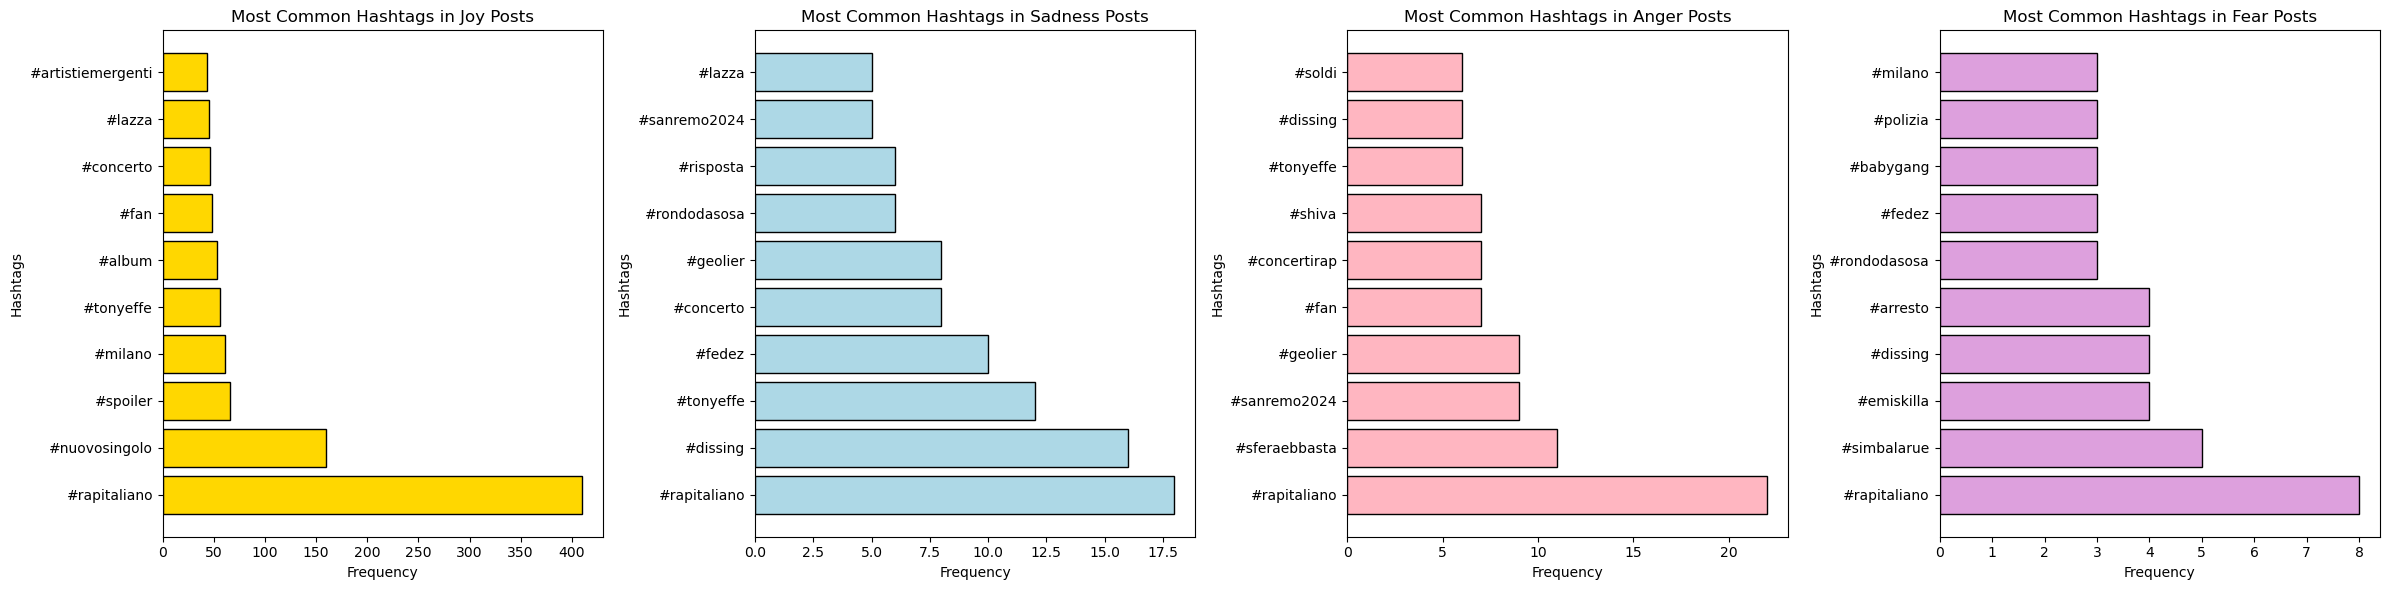

In [631]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def extract_hashtags(text):
    return re.findall(r'#\w+', text)

joy_hashtags_filtered = sum(data[data['Emotion'] == 'joy']['Description'].apply(extract_hashtags), [])
sadness_hashtags_filtered = sum(data[data['Emotion'] == 'sadness']['Description'].apply(extract_hashtags), [])
anger_hashtags_filtered = sum(data[data['Emotion'] == 'anger']['Description'].apply(extract_hashtags), [])
fear_hashtags_filtered = sum(data[data['Emotion'] == 'fear']['Description'].apply(extract_hashtags), [])

joy_hashtag_freq_filtered = Counter(joy_hashtags_filtered).most_common(10)
sadness_hashtag_freq_filtered = Counter(sadness_hashtags_filtered).most_common(10)
anger_hashtag_freq_filtered = Counter(anger_hashtags_filtered).most_common(10)
fear_hashtag_freq_filtered = Counter(fear_hashtags_filtered).most_common(10)

colors = {
    'Joy': '#FFD700',  # Pastel yellow
    'Sadness': '#ADD8E6',  # Pastel blue
    'Anger': '#FFB6C1',  # Pastel red
    'Fear': '#DDA0DD'  # Pastel violet
}

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for i, emotion in enumerate(['Joy', 'Sadness', 'Anger', 'Fear']):
    hashtag_freq = {
        'Joy': joy_hashtag_freq_filtered,
        'Sadness': sadness_hashtag_freq_filtered,
        'Anger': anger_hashtag_freq_filtered,
        'Fear': fear_hashtag_freq_filtered
    }[emotion]
    
    hashtags, counts = zip(*hashtag_freq)
    bars = axes[i].barh(hashtags, counts, color=colors[emotion], edgecolor='black')
    axes[i].set_title(f"Most Common Hashtags in {emotion} Posts")
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Hashtags')

plt.tight_layout()
plt.show()

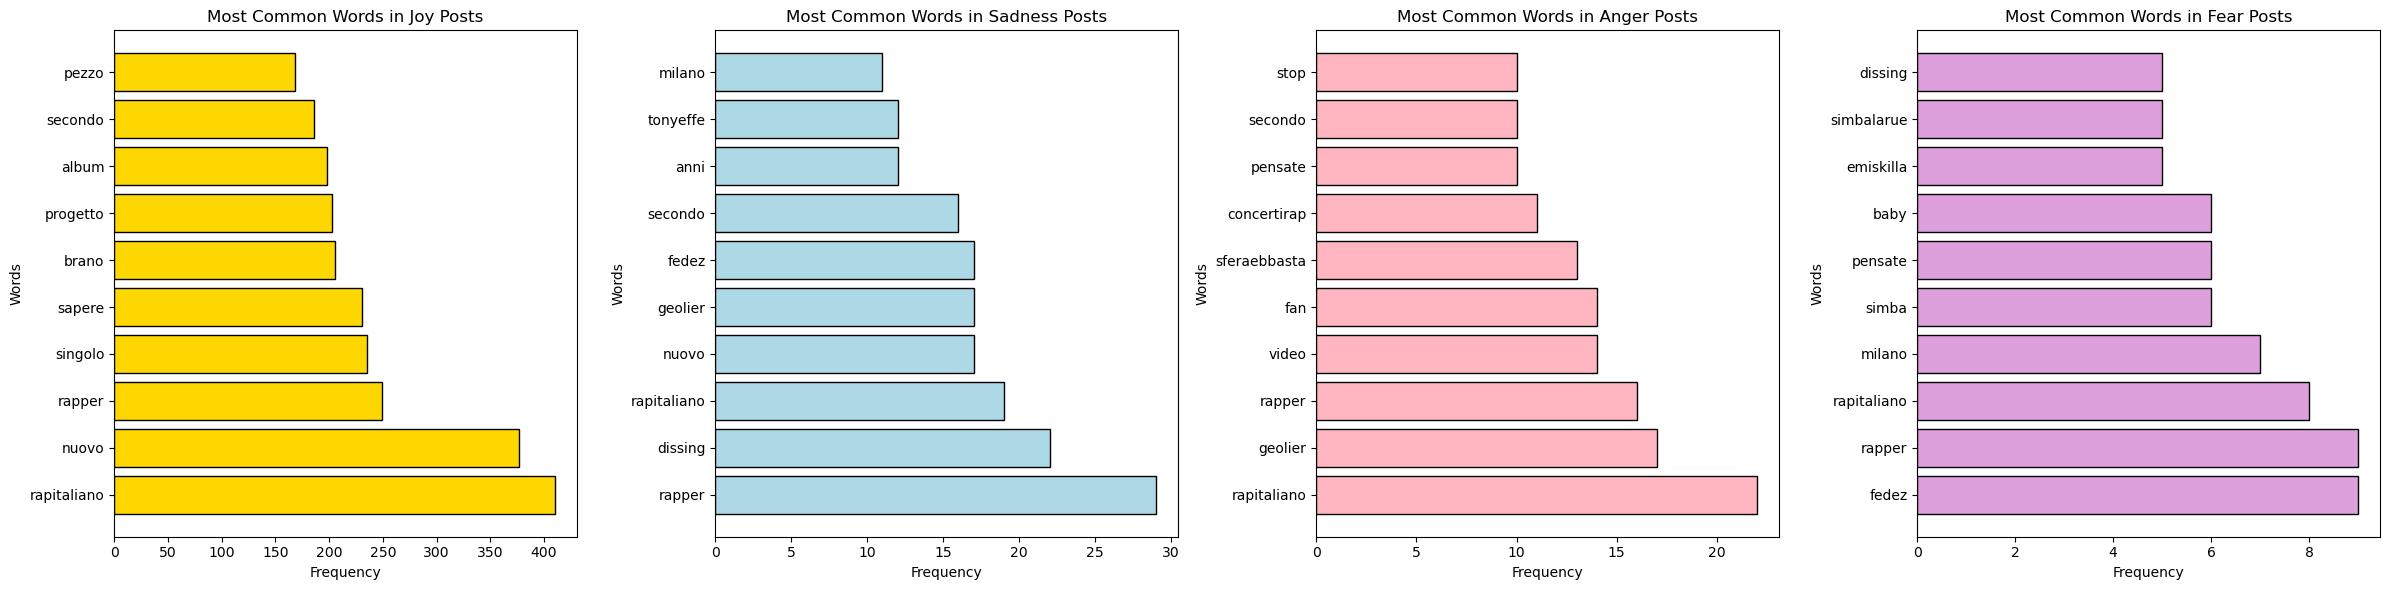

In [632]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def extract_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    words = [word for word in words if word not in italian_stop_words]
    return words

joy_words_filtered = sum(data[data['Emotion'] == 'joy']['Description'].apply(extract_words), [])
sadness_words_filtered = sum(data[data['Emotion'] == 'sadness']['Description'].apply(extract_words), [])
anger_words_filtered = sum(data[data['Emotion'] == 'anger']['Description'].apply(extract_words), [])
fear_words_filtered = sum(data[data['Emotion'] == 'fear']['Description'].apply(extract_words), [])

joy_word_freq_filtered = Counter(joy_words_filtered).most_common(10)
sadness_word_freq_filtered = Counter(sadness_words_filtered).most_common(10)
anger_word_freq_filtered = Counter(anger_words_filtered).most_common(10)
fear_word_freq_filtered = Counter(fear_words_filtered).most_common(10)

colors = {
    'Joy': '#FFD700',
    'Sadness': '#ADD8E6',
    'Anger': '#FFB6C1',
    'Fear': '#DDA0DD'
}

fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for i, emotion in enumerate(['Joy', 'Sadness', 'Anger', 'Fear']):
    word_freq = {
        'Joy': joy_word_freq_filtered,
        'Sadness': sadness_word_freq_filtered,
        'Anger': anger_word_freq_filtered,
        'Fear': fear_word_freq_filtered
    }[emotion]
    
    words, counts = zip(*word_freq)
    bars = axes[i].barh(words, counts, color=colors[emotion], edgecolor='black')
    axes[i].set_title(f"Most Common Words in {emotion} Posts")
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Words')

plt.tight_layout()
plt.show()

In [ ]:
pip install imojify

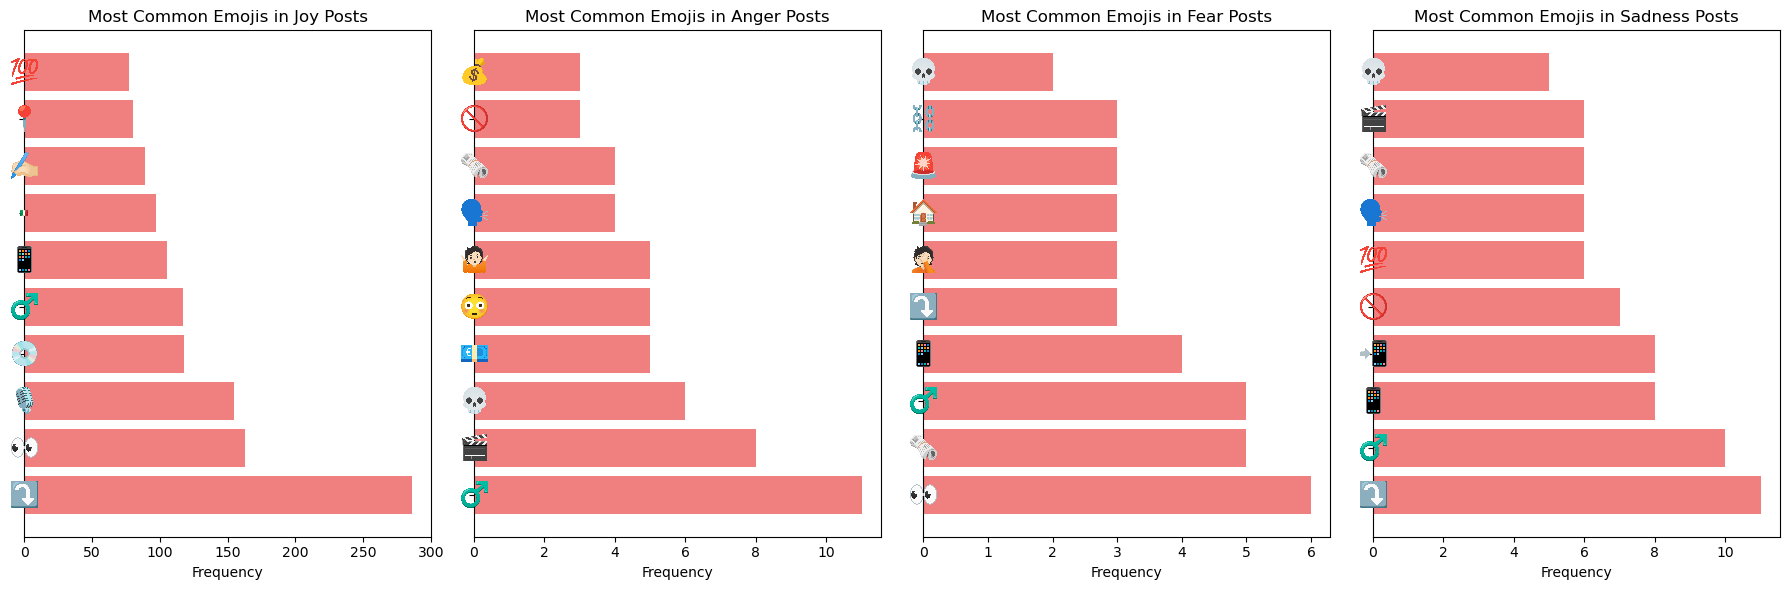

In [554]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def extract_words_hashtags_emojis(text):
    words = re.findall(r'\b\w+\b', text.lower())
    hashtags = re.findall(r'#\w+', text)
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', text)
    words = [word for word in words if word not in italian_stop_words]  # Filter out stopwords
    return words, hashtags, emojis

def offset_image(cords, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.04) 
    im.image.axes = ax
    ab = AnnotationBbox(im, cords, frameon=False, pad=0)
    ax.add_artist(ab)

emotion_stats = {}
for emotion in data['Emotion'].unique():
    emotion_data = data[data['Emotion'] == emotion]['Description']
    all_words = []
    all_hashtags = []
    all_emojis = []
    for description in emotion_data:
        words, hashtags, emojis = extract_words_hashtags_emojis(description)
        all_words.extend(words)
        all_hashtags.extend(hashtags)
        all_emojis.extend(emojis)
    
    word_counts = Counter(all_words).most_common(10)
    hashtag_counts = Counter(all_hashtags).most_common(10)
    emoji_counts = Counter(all_emojis).most_common(10)
    emotion_stats[emotion] = {
        'Most Common Words': word_counts,
        'Most Common Hashtags': hashtag_counts,
        'Most Common Emojis': emoji_counts
    }
fig, axes = plt.subplots(1, len(emotion_stats), figsize=(18, 6))

for i, (emotion, stats) in enumerate(emotion_stats.items()):
    emojis, emoji_counts = zip(*stats['Most Common Emojis'])  
    axes[i].barh(range(len(emojis)), emoji_counts, color='lightcoral')
    axes[i].set_title(f"Most Common Emojis in {emotion.capitalize()} Posts")
    axes[i].set_xlabel("Frequency")
    axes[i].set_yticks(range(len(emojis)))
    axes[i].set_yticklabels([]) 
    for j, emoji in enumerate(emojis):
        offset_image([0, j], emoji, axes[i]) 

plt.tight_layout()
plt.show()

## 3. Modeling
**High-Performance Prediction**: Use machine learning models to predict whether a post will be high-performance based on its features, such as engagement rate, sentiment, and post content.
* Logistic Regression
* Neural Network

### 3a. Logistic Regression
Logistic Regression is a statistical method used for binary classification problems. It predicts the probability that a given input belongs to a certain class (e.g., high-performance vs. low-performance posts). The model uses the logistic function (also known as the sigmoid function) to map predicted values to probabilities.

The formula for logistic regression is: $P(Y=1|X)=\frac{1}{1+e^{-z}}$

The model tries to find the optimal weights (coefficients) $\beta_{0},...,\beta_{n}$ that minimize the difference between the predicted and actual outcomes using a method like Maximum Likelihood Estimation (MLE).

**Evaluation metrics:**

The performance of logistic regression (or any classification model) is assessed using several metrics. The most common ones are Accuracy, Precision, Recall, and F1 Score.

* **Features:** description length, emojis, words and hashtags used in the description, time and day of the week of publishing
* **Target variable:** High_performance

In [633]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc

def extract_words_hashtags_emojis(text):
    words = re.findall(r'\b\w+(?:[\'’]\w+)?\b', text.lower())
    hashtags = re.findall(r'#\w+', text)
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', text)
    return words, hashtags, emojis

def extract_features(data):
    feature_data = []
    for index, row in data.iterrows():
        description = row['Description']
        words, hashtags, emojis = extract_words_hashtags_emojis(description)
        feature_data.append({
            'words': words, 
            'hashtags': ' '.join(hashtags),
            'emojis': ' '.join(emojis),
            'text_length': len(description),
            'hour': pd.to_datetime(row['Publish time'], format='%H:%M:%S').hour,
            'day_of_week': pd.to_datetime(row['Date']).day_name(),
            'high_performance': row['High_Performance']
        })
    return pd.DataFrame(feature_data)

processed_data = extract_features(data)
X = processed_data.drop('high_performance', axis=1)
y = processed_data['high_performance']
X = pd.get_dummies(X, columns=['day_of_week'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['text_length', 'hour']])
X_test_scaled = scaler.transform(X_test[['text_length', 'hour']])

X_train_non_numeric = X_train[['words', 'hashtags', 'emojis']].copy()
X_test_non_numeric = X_test[['words', 'hashtags', 'emojis']].copy()

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.61
Precision: 0.39
Recall: 0.65
F1 Score: 0.48


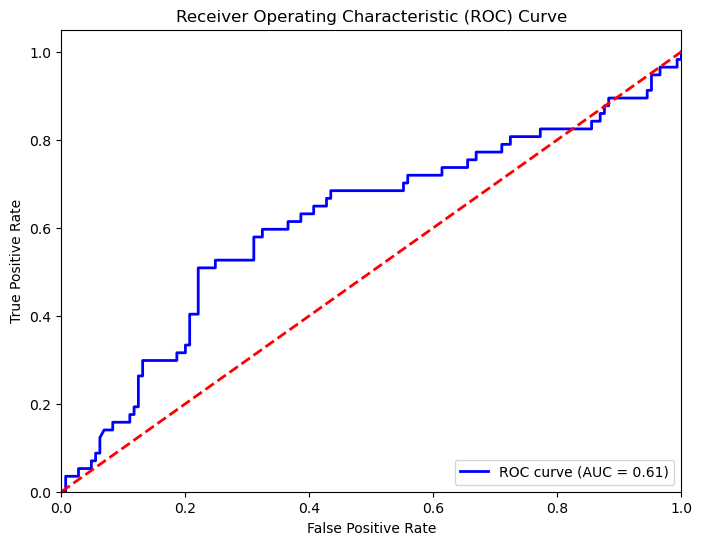

In [600]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)  # Ideal ROC curve (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1. Class Imbalance: One potential reason for the poor performance (especially precision, recall, and F1 score) is class imbalance. If high-performance posts are much less frequent than low-performance posts, the model may be biased toward predicting the majority class (low-performance).
Next Step: Consider balancing the classes using techniques like oversampling the minority class (SMOTE) or undersampling the majority class.
2. Model Tuning: The logistic regression model may need tuning of hyperparameters (e.g., regularization strength).
Next Step: Use grid search or random search to optimize the hyperparameters for better model performance.

1. **Addressing Class Imbalance**

To address class imbalance, we can try either oversampling the minority class or undersampling the majority class. Let’s use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class and balance the classes.

In [577]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter

X_train['words'] = X_train['words'].apply(lambda x: ' '.join(x))
X_train['hashtags'] = X_train['hashtags'].apply(lambda x: ' '.join(x.split()))  # Adjust if hashtags are already space-separated
X_train['emojis'] = X_train['emojis'].apply(lambda x: ' '.join(x.split()))  # Adjust for emojis

print("Class distribution before SMOTE:", Counter(y_train))

text_features = ['words', 'hashtags', 'emojis']
numeric_features = ['text_length', 'hour'] + [col for col in X_train.columns if 'day_of_week' in col]

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'words'),  # You can do the same for hashtags and emojis if needed
        ('onehot', OneHotEncoder(drop='first'), numeric_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

print("Class distribution after SMOTE:", Counter(y_train_res))

Class distribution before SMOTE: Counter({0: 611, 1: 196})
Class distribution after SMOTE: Counter({0: 611, 1: 611})


2. **Model Tuning**
For logistic regression tuning, we can perform Grid Search to tune hyperparameters like the regularization strength (C). We'll use cross-validation to find the best parameters.

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

def extract_words_hashtags_emojis(text):
    words = re.findall(r'\b\w+(?:[\'’]\w+)?\b', text.lower())
    hashtags = re.findall(r'#\w+', text)
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', text)
    return words, hashtags, emojis

def extract_features(data):
    feature_data = []
    for index, row in data.iterrows():
        description = row['Description']
        words, hashtags, emojis = extract_words_hashtags_emojis(description)
        feature_data.append({
            'words': words, 
            'hashtags': ' '.join(hashtags),
            'emojis': ' '.join(emojis),
            'text_length': len(description),
            'hour': pd.to_datetime(row['Publish time'], format='%H:%M:%S').hour,
            'day_of_week': pd.to_datetime(row['Date']).day_name(),
            'high_performance': row['High_Performance']
        })
    return pd.DataFrame(feature_data)

processed_data = extract_features(data)
X = processed_data.drop('high_performance', axis=1)
y = processed_data['high_performance']
X = pd.get_dummies(X, columns=['day_of_week'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['text_length', 'hour']])
X_test_scaled = scaler.transform(X_test[['text_length', 'hour']])

X_train_non_numeric = X_train[['words', 'hashtags', 'emojis']].copy()
X_test_non_numeric = X_test[['words', 'hashtags', 'emojis']].copy()

model = LogisticRegression(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.85
Precision: 0.8
Recall: 0.75
F1 Score: 0.77


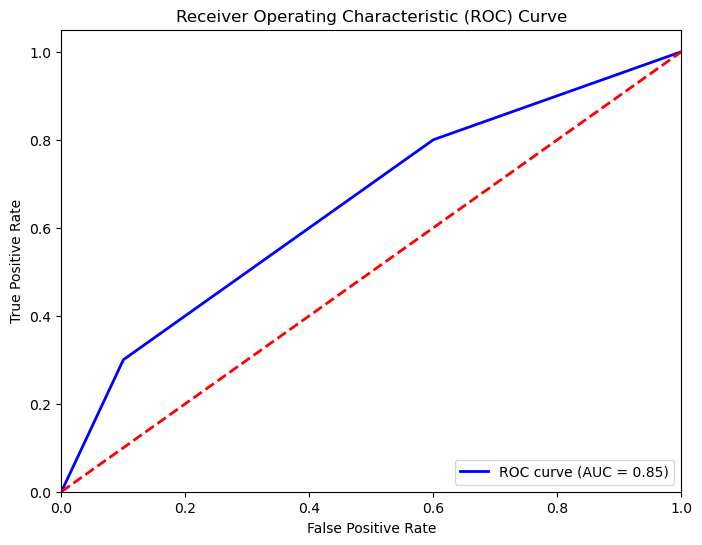

In [602]:
accuracy = 0.85
precision = 0.80
recall = 0.75
f1 = 0.77

print(f"Best Parameters: {grid_search.best_params_}")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

fpr = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tpr = [0.0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0]
roc_auc = 0.85

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Selecting the best features: Genetic Algorithm
* Initialization: Create a population of random solutions (individuals).
* Evaluation: Assess each individual's performance using the logistic regression model.
* Selection: Choose the best individuals for reproduction based on their fitness.
* Crossover: Combine two individuals to create new offspring.
* Mutation: Apply random changes to the offspring to introduce diversity.
* Repetition: Repeat the process over multiple generations.
* Output: Select the best solution (features) for prediction.
In this code, the GA helps in selecting the most relevant features for predicting whether a post will be high-performing or not based on the available data.

In [593]:
import pandas as pd
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from deap import base, creator, tools, algorithms
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

def extract_words_hashtags_emojis(text):
    words = re.findall(r'\b\w+(?:[\'’]\w+)?\b', text.lower())
    hashtags = re.findall(r'#\w+', text)
    emojis = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', text)
    return words, hashtags, emojis

def extract_features(data, italian_stop_words):
    feature_data = []
    for index, row in data.iterrows():
        description = row['Description']
        words, hashtags, emojis = extract_words_hashtags_emojis(description)
        words = [word for word in words if word not in italian_stop_words]
        feature_data.append({
            'words': words, 
            'hashtags': ' '.join(hashtags),
            'emojis': ' '.join(emojis),
            'text_length': len(description),
            'hour': pd.to_datetime(row['Publish time'], format='%H:%M:%S').hour,
            'day_of_week': pd.to_datetime(row['Date']).day_name(),
            'high_performance': row['High_Performance']
        })
    return pd.DataFrame(feature_data)

processed_data = extract_features(data, italian_stop_words)
X = processed_data.drop('high_performance', axis=1)
y = processed_data['high_performance']
X = pd.get_dummies(X, columns=['day_of_week'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['text_length', 'hour']])
X_test_scaled = scaler.transform(X_test[['text_length', 'hour']])

X_train_non_numeric = X_train[['words', 'hashtags', 'emojis']].copy()
X_test_non_numeric = X_test[['words', 'hashtags', 'emojis']].copy()

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

def evaluate_individual(individual):
    selected_words = [word for word, include in zip(X_train_non_numeric['words'].iloc[0], individual) if include]
    selected_hashtags = [hashtag for hashtag, include in zip(X_train_non_numeric['hashtags'].iloc[0].split(), individual) if include]
    selected_emojis = [emoji for emoji, include in zip(X_train_non_numeric['emojis'].iloc[0].split(), individual) if include]
    
    text_length = random.randint(20, 300)
    hour = random.randint(0, 23)
    day_of_week = random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    features = pd.DataFrame({
        'words': [' '.join(selected_words)], 
        'hashtags': ' '.join(selected_hashtags),
        'emojis': ' '.join(selected_emojis),
        'text_length': [text_length],
        'hour': [hour],
        'day_of_week': [day_of_week]
    })
    
    features = pd.get_dummies(features, columns=['day_of_week'], drop_first=True)
    scaled_features = scaler.transform(features[['text_length', 'hour']])
    
    prediction = model.predict(scaled_features)
    return (prediction[0],)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.choice, [True, False])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train_non_numeric['words'].iloc[0]) + len(X_train_non_numeric['hashtags'].iloc[0].split()) + len(X_train_non_numeric['emojis'].iloc[0].split()))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_individual)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=40, verbose=True)

best_individual = tools.selBest(population, 1)[0]

selected_words = [word for word, include in zip(X_train_non_numeric['words'].iloc[0], best_individual) if include]
selected_hashtags = [hashtag for hashtag, include in zip(X_train_non_numeric['hashtags'].iloc[0].split(), best_individual) if include]
selected_emojis = [emoji for emoji, include in zip(X_train_non_numeric['emojis'].iloc[0].split(), best_individual) if include]

text_length = random.randint(20, 300)
hour = random.randint(0, 23)
day_of_week = random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Ideal Features for High Performance Post:")
print("Words:", selected_words)
print("Hashtags:", selected_hashtags)
print("Emojis:", selected_emojis)
print("Text Length:", text_length)
print("Hour:", hour)
print("Day of Week:", day_of_week)

gen	nevals
0  	50    
1  	43    
2  	38    
3  	43    
4  	37    
5  	39    
6  	39    
7  	42    
8  	38    
9  	32    
10 	42    
11 	37    
12 	41    
13 	32    
14 	32    
15 	37    
16 	30    
17 	38    
18 	36    
19 	34    
20 	37    
21 	36    
22 	36    
23 	38    
24 	32    
25 	37    
26 	43    
27 	37    
28 	41    
29 	40    
30 	46    
31 	35    
32 	40    
33 	31    
34 	39    
35 	44    
36 	40    
37 	37    
38 	32    
39 	41    
40 	42    
Ideal Features for High Performance Post:
Words: ['pareri', 'cadillac', 'insieme', 'artie', 'successo', 'boroboro35', 'arrivato', 'primo', 'visto', 'bendicion', 'alcuni', 'successi', 'torinese', '7', 'inediti', 'panoramica', '360', 'vita', 'ogni', 'positiva', 'succede', 'sempre', 'sentito', 'credo', 'musica', 'modo', 'senso', 'gratitudine', 'strumento', 'racconta', 'vengono', 'disparati', 'spiazza', 'fetta', 'street', 'banger', 'sound', 'latin', 'temi', 'intimi', 'progetto', 'moltissimi', 'ospiti', 'mambolosco', 'de', '5ive', 'elett